In [33]:
import openturns as ot
import numpy as np
rosenbrock = ot.SymbolicFunction(['x1', 'x2'], ['(1-x1)^2+100*(x2-x1^2)^2'])
problem = ot.OptimizationProblem(rosenbrock)

In [34]:
algo = ot.Cobyla(problem)
algo.setStartingPoint([1.0] * 2)
algo.run()
result = algo.getResult()

In [35]:
result.getOptimalPoint()

class=Point name=Unnamed dimension=2 values=[1.00001,0.999996]

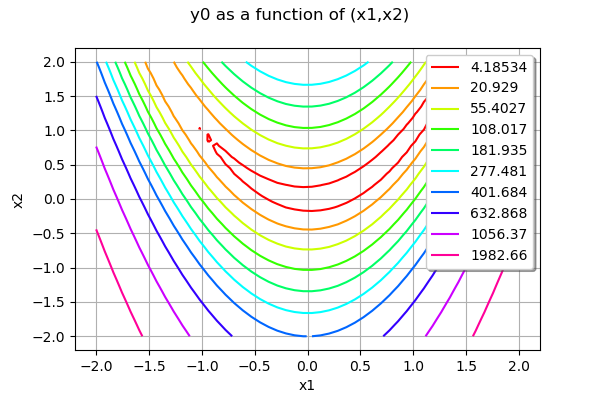

In [36]:
a = ot.Point([-2 , -2])
b = ot.Point([2 , 2 ])
nbPoints = [50, 50]
figure = rosenbrock.draw(a, b, nbPoints)
figure

In [37]:
algo.getMaximumIterationNumber()

100

In [38]:
rosenbrock.hessian(result.getOptimalPoint())

class=SymmetricTensor implementation=class=TensorImplementation name=Unnamed rows=2 columns=2 sheets=1 values=[802.024,-400.004,0,200]

In [39]:
rosenbrock.gradient(result.getOptimalPoint())

class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=2 columns=1 values=[0.00893448,-0.00445793]

In [82]:
dim = 2
A = 10
def f(x) :
    h = 2*A + x[0]**2 - A * np.cos(2 * np.pi * x[0]) +x[1]**2 - A * np.cos(2 * np.pi * x[1])
    y = [h]
    return y


In [83]:
myFunction = ot.PythonFunction (2 ,1 , f )

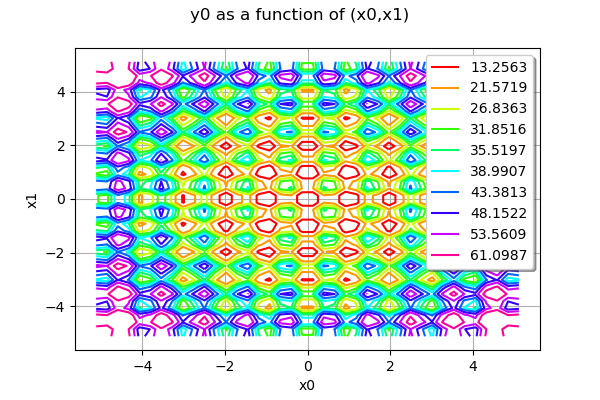

In [84]:
a = ot.Point([-5.12 , -5.12])
b = ot.Point([5.12 , 5.12 ])
nbPoints = [40, 40]
figure = myFunction.draw(a, b, nbPoints)
figure

In [85]:
bounds = ot.Interval([-5.12] * dim, [5.12] * dim)
problem = ot.OptimizationProblem(myFunction)
problem.setBounds(bounds)
solver = ot.TNC(problem)
startingPoints = ot.Normal(dim).getSample(3)
algo = ot.MultiStart(solver, startingPoints)
algo.run()
result = algo.getResult()
startingPoints


class=Sample name=Normal implementation=class=SampleImplementation name=Normal size=3 dimension=2 description=[X0,X1] data=[[0.184356,-1.53073],[0.655027,0.538071],[1.73821,-0.958722]]

In [86]:
result.getOptimalPoint()

class=Point name=Unnamed dimension=2 values=[7.00321e-11,-1.98991]